In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import os
os.listdir()

['.config', 'titanic.csv', 'sample_data']

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df.shape)
df.info()
df.describe()

(418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


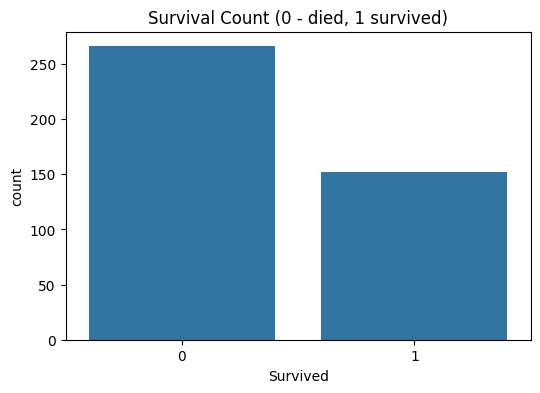

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x ='Survived', data = df)
plt.title("Survival Count (0 - died, 1 survived)")
plt.show()

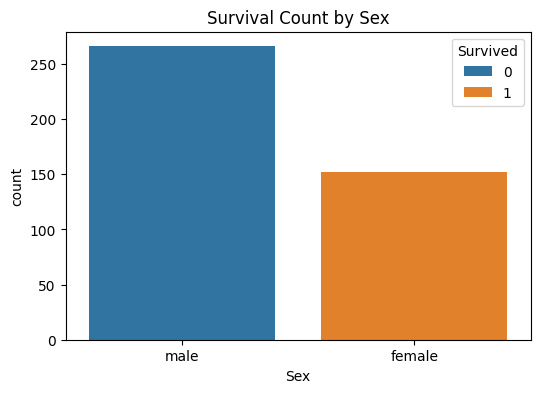

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title("Survival Count by Sex")
plt.show()

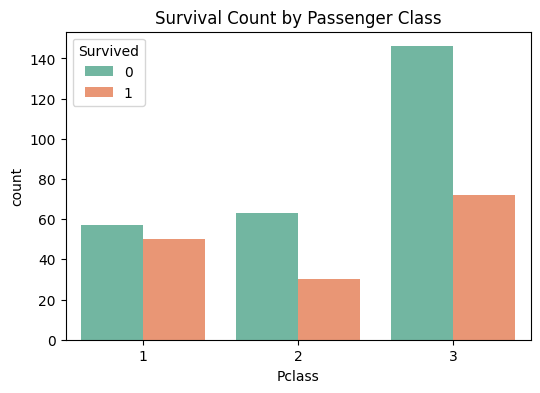

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette='Set2')
plt.title("Survival Count by Passenger Class")
plt.show()

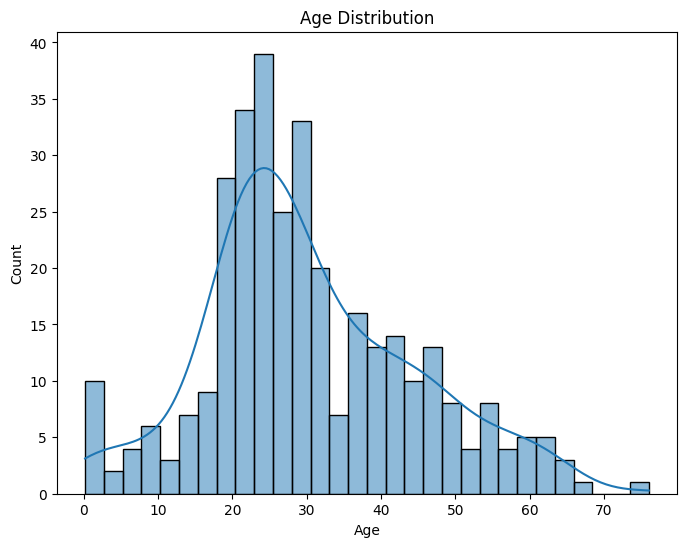

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

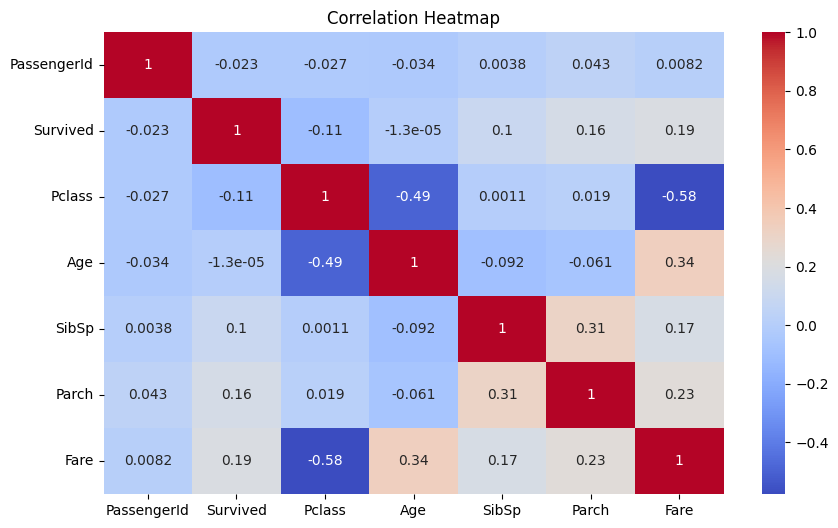

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#encode categorical features
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

#Drop the less useful columns
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,True,True,False
1,1,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True


In [ ]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy:  1.0


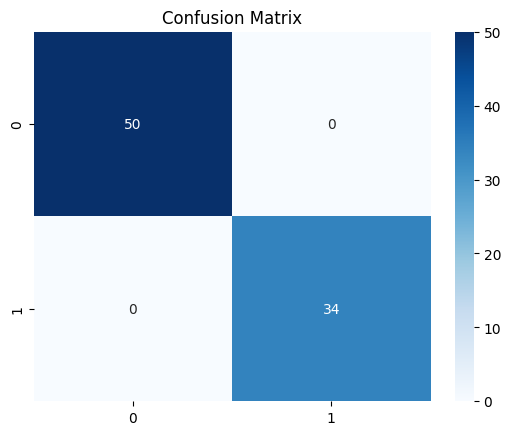

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
#performance eval
print("Accuracy: ",accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy on Test Set: {:.2f}%".format(acc*100))

Model Accuracy on Test Set: 100.00%


In [ ]:
X_train_scaled = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test, columns=X.columns)

print("Variance of each feature after scaling:")
print(X_train_scaled.var().round(2))
print("Overall mean of scaled features:", np.mean(X_train))
print("Overall variance of scaled features:", np.var(X_train))


Variance of each feature after scaling:
Pclass        1.0
Age           1.0
SibSp         1.0
Parch         1.0
Fare          1.0
Sex_male      1.0
Embarked_Q    1.0
Embarked_S    1.0
dtype: float64
Overall mean of scaled features: 8.476253631120208e-18
Overall variance of scaled features: 1.0


In [ ]:
scores = cross_val_score(log_reg,X,y,cv=10)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 1.0


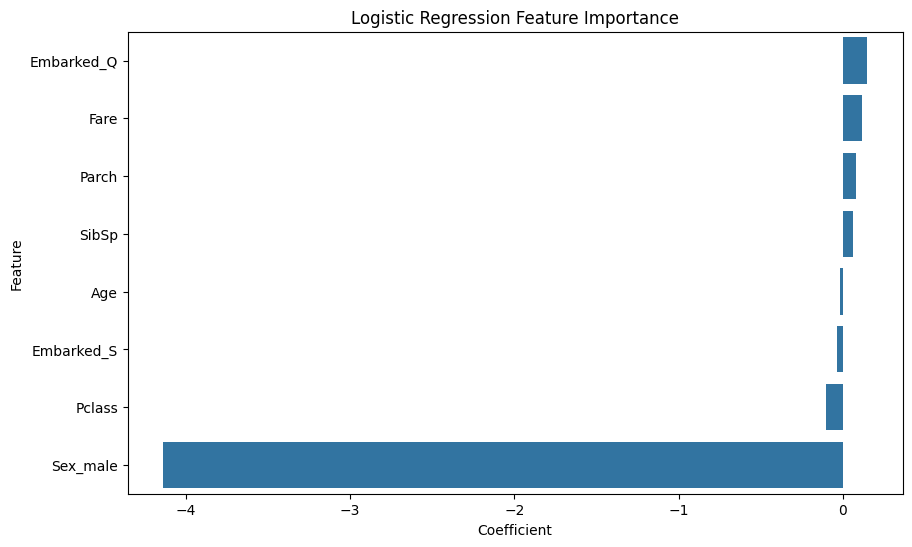

In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title("Logistic Regression Feature Importance")
plt.show()

In [ ]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
print(comparison.head(10))

   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       0          0
4       1          1
5       0          0
6       1          1
7       0          0
8       1          1
9       0          0


In [ ]:
correct_predictions = (y_test == y_pred).sum()
total_predictions = len(y_test)
print(f"Correct Predictions: {correct_predictions}/{total_predictions}")
print("Accuracy: {:.2f}%".format((correct_predictions/total_predictions)*100))

Correct Predictions: 84/84
Accuracy: 100.00%


Survival % by Passenger Class:
 Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


/tmp/ipython-input-128344912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_survival.index, y=class_survival.values, palette="Set2")


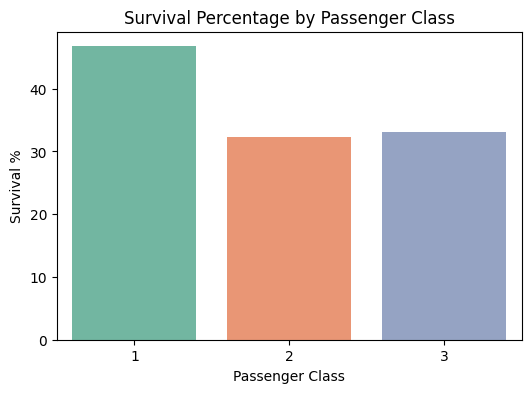

In [ ]:
# Class survival percentage
class_survival = df.groupby("Pclass")["Survived"].mean() * 100
print("Survival % by Passenger Class:\n", class_survival)
plt.figure(figsize=(6,4))
sns.barplot(x=class_survival.index, y=class_survival.values, palette="Set2")
plt.title("Survival Percentage by Passenger Class")
plt.ylabel("Survival %")
plt.xlabel("Passenger Class")
plt.show()

Survival % by Family Size:
 FamilySize
1     26.877470
2     48.648649
3     52.631579
4     71.428571
5     28.571429
6     66.666667
7     25.000000
8     50.000000
11    50.000000
Name: Survived, dtype: float64


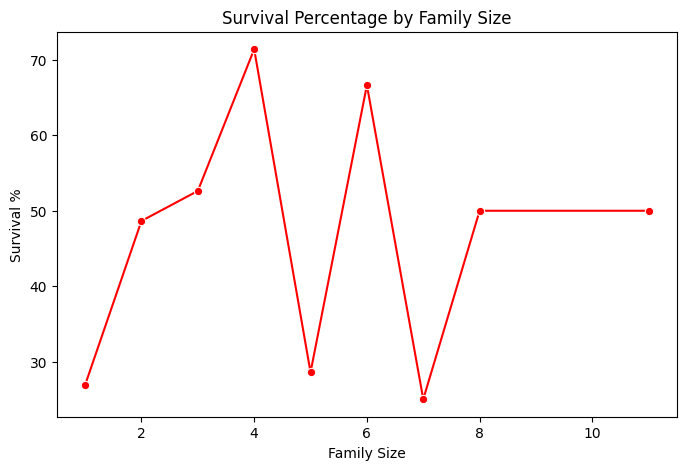

In [ ]:
# Create new feature: FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # +1 includes the passenger

# Survival % by family size
family_survival = df.groupby("FamilySize")["Survived"].mean() * 100
print("Survival % by Family Size:\n", family_survival)
plt.figure(figsize=(8,5))
sns.lineplot(x=family_survival.index, y=family_survival.values, marker="o", color="red")
plt.title("Survival Percentage by Family Size")
plt.ylabel("Survival %")
plt.xlabel("Family Size")
plt.show()

In [ ]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_best)*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
# Example random passenger data
random_passenger = pd.DataFrame([{
    "Pclass": 3,
    "Age": 25,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,   # 1 = Male, 0 = Female
    "Embarked_Q": 0,
    "Embarked_S": 1
}])
random_passenger_scaled = scaler.transform(random_passenger)
# Predict
prediction = best_model.predict(random_passenger_scaled)[0]
probability = best_model.predict_proba(random_passenger_scaled)[0][1]

print("Prediction:", "Survived " if prediction == 1 else "Did not Survive")
print("Survival Probability: {:.2f}%".format(probability * 100))

Prediction: Did not Survive
Survival Probability: 36.31%


In [ ]:
def predict_survival(model, scaler, X_columns):
    print("Enter Passenger Details:")

    Pclass = int(input("Pclass (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    Sex = input("Sex (male/female): ").lower()
    Age = float(input("Age: "))
    SibSp = int(input("Number of siblings/spouses aboard: "))
    Parch = int(input("Number of parents/children aboard: "))
    Fare = float(input("Fare: "))
    Embarked = input("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton): ").upper()
    new_passenger = pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
    new_passenger = pd.get_dummies(new_passenger, columns=['Sex', 'Embarked'])
    new_passenger = new_passenger.reindex(columns=X_columns, fill_value=0)  # align columns
    new_passenger_scaled = scaler.transform(new_passenger)
    prediction = model.predict(new_passenger_scaled)
    probability = model.predict_proba(new_passenger_scaled)[0][1]

    if prediction[0] == 1:
        print(f"\n The passenger would have SURVIVED with probability {probability:.2f}")
    else:
        print(f"\nThe passenger would NOT have survived with probability {1-probability:.2f}")
predict_survival(best_model, scaler, X.columns)

Enter Passenger Details:
Pclass (1 = 1st, 2 = 2nd, 3 = 3rd): 3
Sex (male/female): male
Age: 56
Number of siblings/spouses aboard: 1
Number of parents/children aboard: 1
Fare: 8.35
Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton): S

The passenger would NOT have survived with probability 0.64
